# 全モデルについて学習サンプル数ごとの性能推移の比較

In [1]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import atlasify

# font: Arial
plt.rcParams["font.family"] = "sans-serif"
# fontsize: 15
plt.rcParams["font.size"] = 15

In [2]:
with open("./comparisons/samplesize_all/rejection_values.yaml", 'r') as f:
    rejection_values = yaml.safe_load(f)

In [3]:
for model, value in rejection_values["ttbar"]["ctag"].items():
    if model in ["ParticleNet-Lite_22M", "dips_22M", "GN1_22M", "GN2_22M", "ParT_22M", "ParT-aux_22M"]:
        print(f"{model}: {value}")

GN1_22M: {'Light-jets': [34.83416830490202, 0.10077181069340352], 'b-jets': [11.807142574961484, 0.019304391278089302]}
GN2_22M: {'Light-jets': [50.0102424035507, 0.17412384493207292], 'b-jets': [17.508330209016776, 0.03537953871005877]}
ParT-aux_22M: {'Light-jets': [49.05200321945985, 0.1691951392761039], 'b-jets': [15.999378728965155, 0.03083295434459655]}
ParT_22M: {'Light-jets': [41.847031223178014, 0.1330822966697143], 'b-jets': [16.00795224366875, 0.03085829204740339]}
ParticleNet-Lite_22M: {'Light-jets': [35.16925170068027, 0.10224373958119312], 'b-jets': [16.379720057435357, 0.03194747610026452]}
dips_22M: {'Light-jets': [29.44163796915408, 0.07808994801454883], 'b-jets': [9.585876209964526, 0.013969471990388506]}


In [4]:
models_base = ["dips", "ParticleNet-Lite", "GN1", "GN2", "ParT", "ParT-aux"]
sample_size = {"01M":1, "05M":5, "10M":10, "15M":15, "22M":22}

In [5]:
def log_func(x, a, b):
    return a * np.log(b * x)

In [14]:
def plot_samplesize(sample:str, tag:str, rej:str, ymax=None):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    for i, model in enumerate(models_base):
        rej_values = []
        rej_errors = []
        for sample_str, sample_int in sample_size.items():
            rej_values.append(rejection_values[sample][tag][f"{model}_{sample_str}"][rej][0])
            rej_errors.append(rejection_values[sample][tag][f"{model}_{sample_str}"][rej][1])
        x = np.array(list(sample_size.values()))
        ax.plot(x, rej_values, color=f"C{i}")
        ax.errorbar(x, rej_values, yerr=rej_errors, capsize=5, fmt="o", color=f"C{i}", label=model)

    ax.set_xlabel("Number of jets [M]", loc="right")
    ax.set_ylabel(f"{rej} rejection", loc="top")
    ax.set_xlim(0, None)
    if ymax is not None:
        ax.set_ylim(0, ymax)
    ax.legend(loc="upper left")
    ax.grid()

    if sample == "ttbar":
        if tag == "btag":
            subtext = "$\sqrt{s}=13 \ \mathrm{TeV}$, PFlow-jets, $t\\bar{t}$ $f_{c}=0.018$\n70% b-tagging efficiency"
        elif tag == "ctag":
            subtext = "$\sqrt{s}=13 \ \mathrm{TeV}$, PFlow-jets, $t\\bar{t}$, $f_{b}=0.200$ \n30% c-tagging efficiency"
    else:
        raise ValueError("zprime is not supported")

    atlasify.atlasify(
        atlas="Simulation Work in Progress",
        subtext=subtext,
        axes=ax,
        font_size=15,
        label_font_size=15,
        sub_font_size=15,
        # offset=self.atlas_vertical_offset,
        # indent=self.atlas_horizontal_offset,
        enlarge=1,
        # brand="" if self.atlas_brand is None else self.atlas_brand,
        # outside=self.atlas_tag_outside,
        subtext_distance=0.2,
    )

    # 各ax.textを右揃えに変更する
    for text in ax.texts:
        if text.get_text() == "ATLAS":
            text._x = 0.46
            continue
        elif text.get_text() == "Simulation Work in Progress":
            text._x = 0.46
            continue
            
        # anchorの変更
        text._x = 0.95
        text._y = 1
        text.set_ha('right')


    plt.tight_layout()
    plt.savefig(f"./comparisons/samplesize_all/{tag}_{sample}_{rej}_rejection.pdf")
    print(f"saved: ./comparisons/samplesize_all/{tag}_{sample}_{rej}_rejection.pdf")

saved: ./comparisons/samplesize_all/btag_ttbar_Light-jets_rejection.pdf
saved: ./comparisons/samplesize_all/btag_ttbar_c-jets_rejection.pdf
saved: ./comparisons/samplesize_all/ctag_ttbar_Light-jets_rejection.pdf
saved: ./comparisons/samplesize_all/ctag_ttbar_b-jets_rejection.pdf


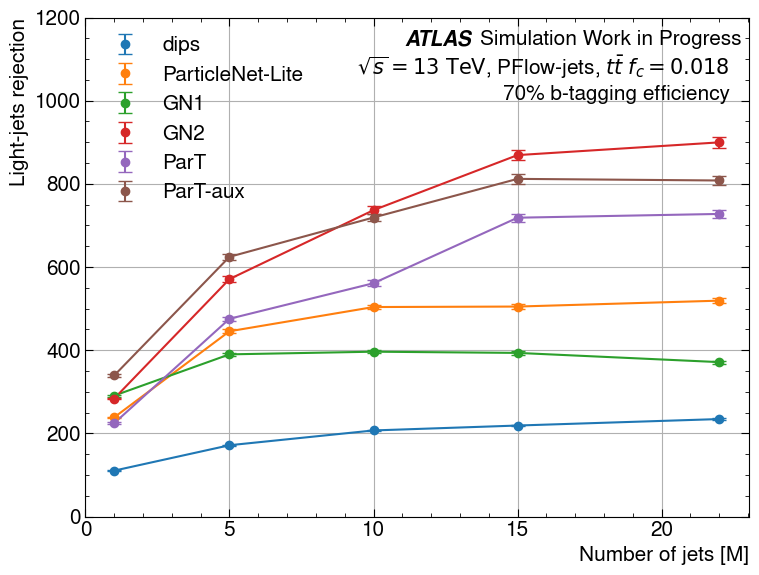

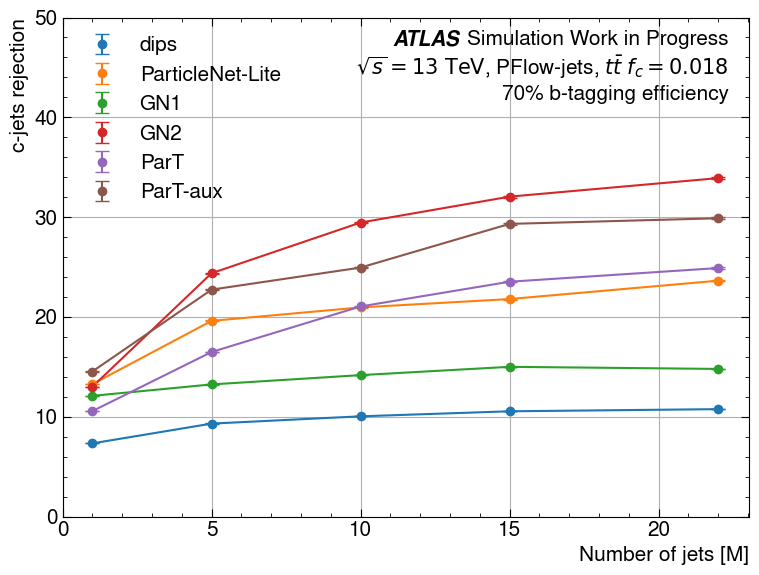

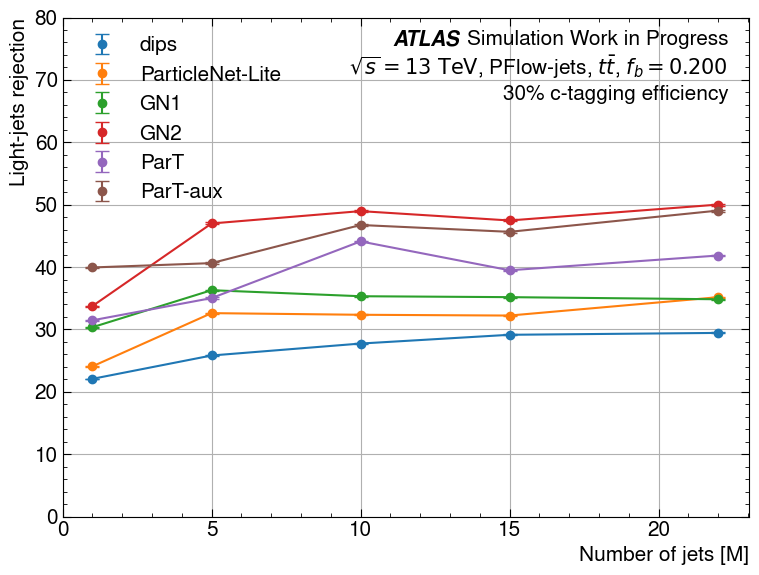

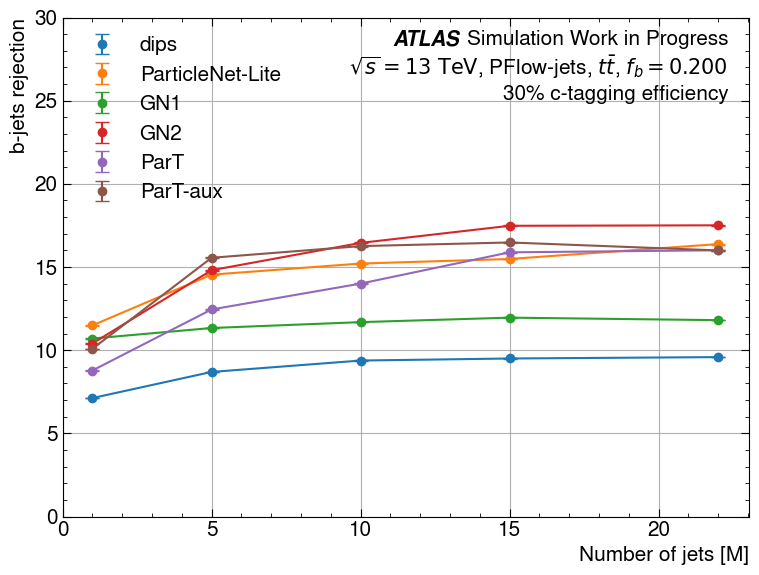

In [15]:
plot_samplesize(sample="ttbar", tag="btag", rej="Light-jets", ymax=1200)
plot_samplesize(sample="ttbar", tag="btag", rej="c-jets", ymax=50)
plot_samplesize(sample="ttbar", tag="ctag", rej="Light-jets", ymax=80)
plot_samplesize(sample="ttbar", tag="ctag", rej="b-jets", ymax=30)